In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fish_df = pd.DataFrame(pd.read_csv(r"C:\Users\vargh\OneDrive\Desktop\PGA02\Fish_dataset.csv"))

In [3]:
fish_df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
fish_df.shape

(159, 7)

In [5]:
fish_df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [6]:
fish_df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

<AxesSubplot:>

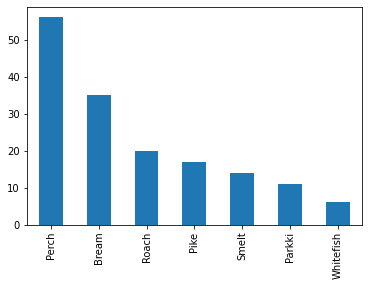

In [7]:
# 1.
fish_df['Species'].value_counts().plot(kind='bar')

C:\ANACONDA3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ANACONDA3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ANACONDA3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ANACONDA3\lib\site-packages\seaborn\_decorators.py:36: FutureWar

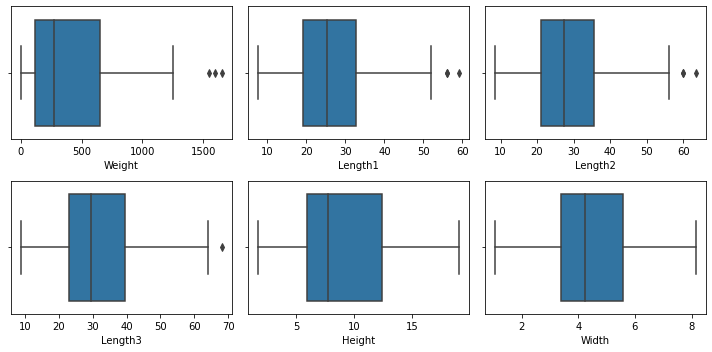

In [8]:
fig,axs = plt.subplots(2,3,figsize=(10,5))
plt1 = sns.boxplot(fish_df['Weight'],ax = axs[0,0])
plt2 = sns.boxplot(fish_df['Length1'],ax = axs[0,1])
plt3 = sns.boxplot(fish_df['Length2'],ax = axs[0,2])
plt1 = sns.boxplot(fish_df['Length3'],ax = axs[1,0])
plt2 = sns.boxplot(fish_df['Height'],ax = axs[1,1])
plt3 = sns.boxplot(fish_df['Width'],ax = axs[1,2])

plt.tight_layout()

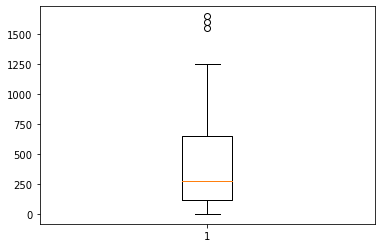

In [9]:
plt.boxplot(fish_df.Weight)
Q1 = fish_df.Weight.quantile(0.25)
Q3 = fish_df.Weight.quantile(0.75)
IQR = Q3 - Q1
fish_df = fish_df[(fish_df.Weight >= Q1 - 1.5*IQR) & 
                  (fish_df.Weight <= Q3 + 1.5*IQR)]

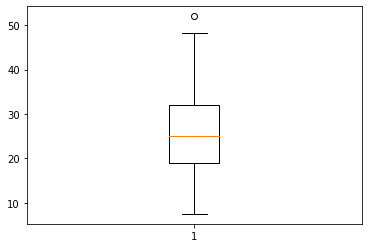

In [10]:
plt.boxplot(fish_df.Length1)
Q1 = fish_df.Length1.quantile(0.25)
Q3 = fish_df.Length1.quantile(0.75)
IQR = Q3 - Q1
fish_df = fish_df[(fish_df.Length1 >= Q1 - 1.5*IQR) & 
                  (fish_df.Length1 <= Q3 + 1.5*IQR)]

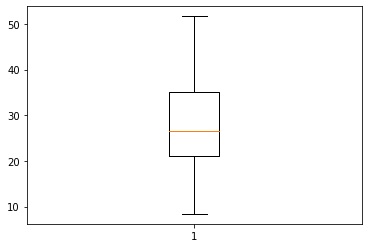

In [11]:
plt.boxplot(fish_df.Length2)
Q1 = fish_df.Length2.quantile(0.25)
Q3 = fish_df.Length2.quantile(0.75)
IQR = Q3 - Q1
fish_df = fish_df[(fish_df.Length2 >= Q1 - 1.5*IQR) & 
                  (fish_df.Length2 <= Q3 + 1.5*IQR)]

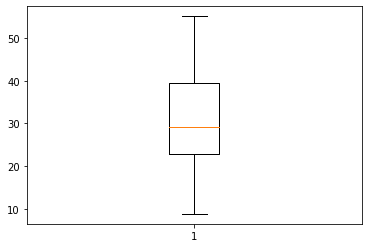

In [12]:
plt.boxplot(fish_df.Length3)
Q1 = fish_df.Length3.quantile(0.25)
Q3 = fish_df.Length3.quantile(0.75)
IQR = Q3 - Q1
fish_df = fish_df[(fish_df.Length3 >= Q1 - 1.5*IQR) & 
                  (fish_df.Length3 <= Q3 + 1.5*IQR)]

In [13]:
fish_df.shape

(155, 7)

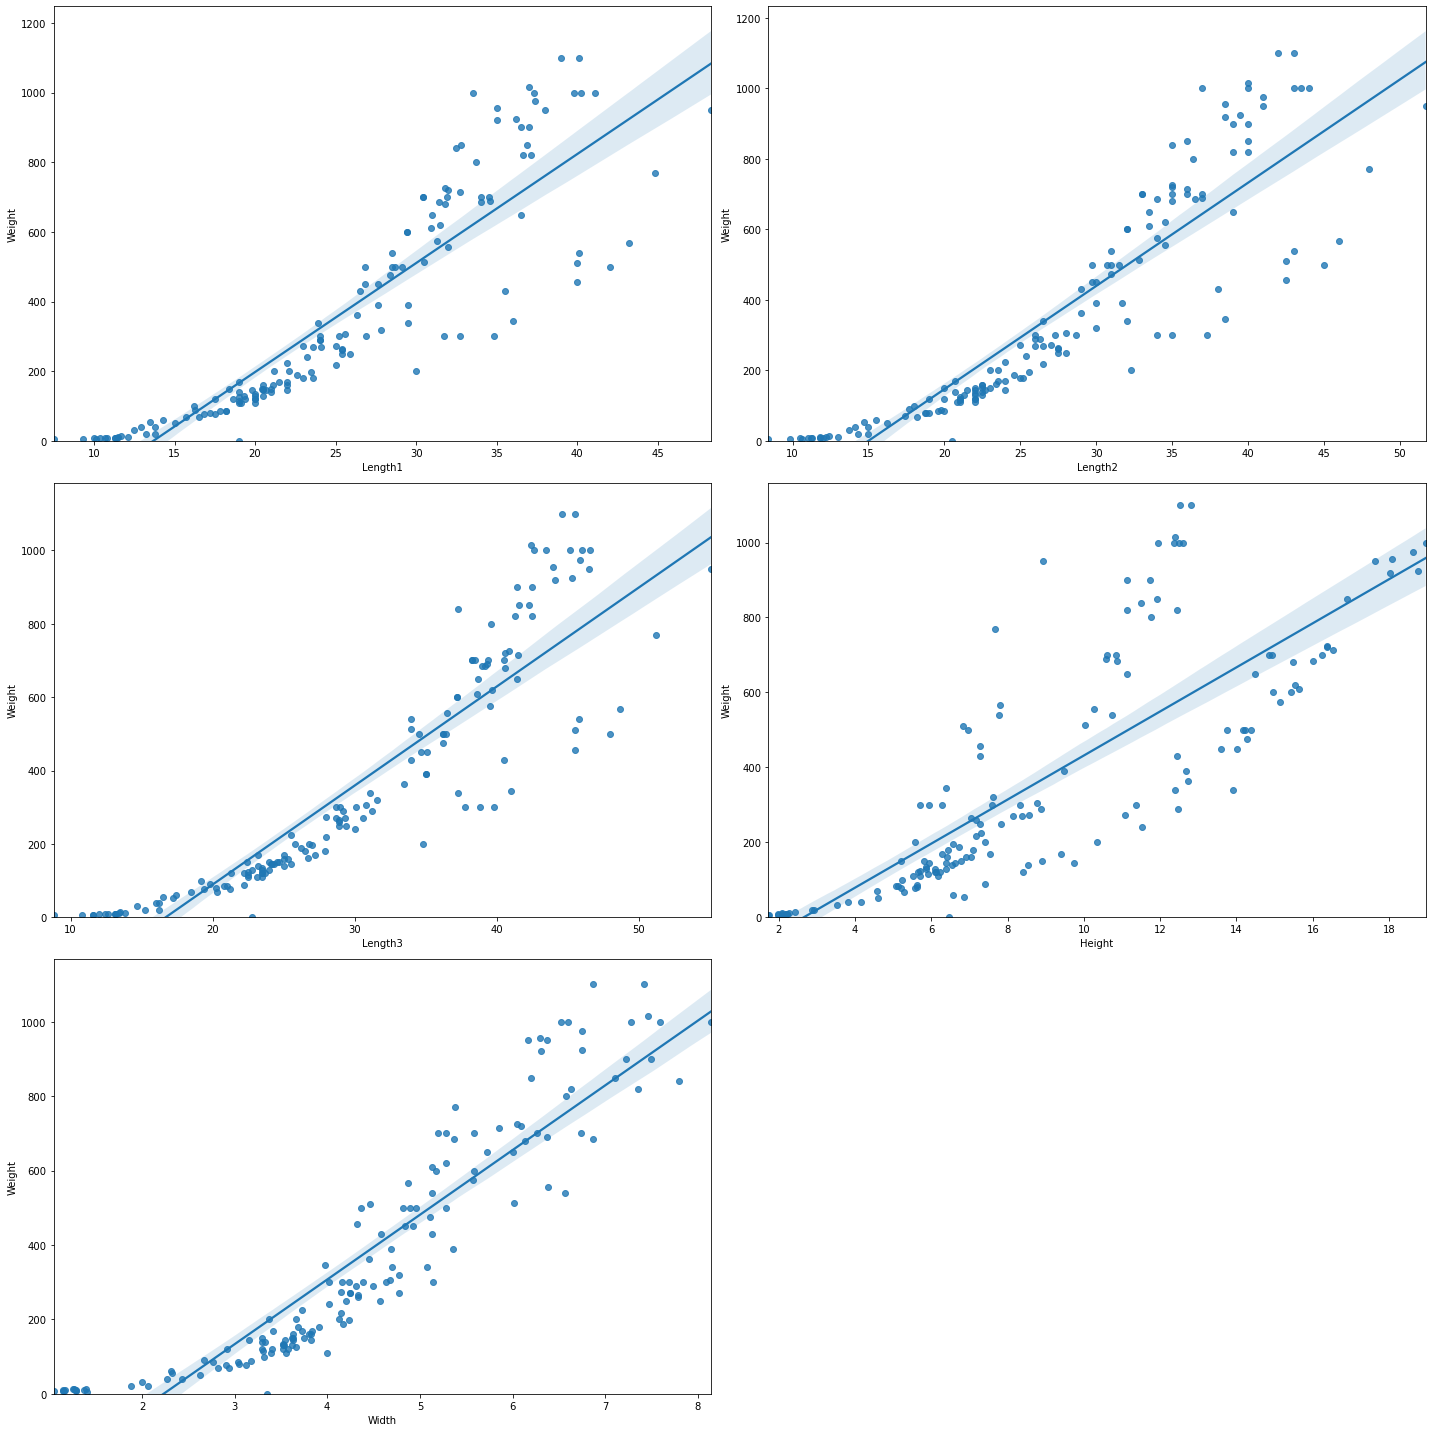

In [14]:
fig, ([ax1, ax2], [ax3, ax4], [ax5, ax6]) = plt.subplots(3, 2, figsize=(20,20))
sns.regplot(x="Length1", y="Weight", data=fish_df, ax=ax1)
sns.regplot(x="Length2", y="Weight", data=fish_df, ax=ax2)
sns.regplot(x="Length3", y="Weight", data=fish_df, ax=ax3)
sns.regplot(x="Height", y="Weight", data=fish_df, ax=ax4)
sns.regplot(x="Width", y="Weight", data=fish_df, ax=ax5)
ax1.set_ylim(0,)
ax2.set_ylim(0,)
ax3.set_ylim(0,)
ax4.set_ylim(0,)
ax5.set_ylim(0,)
fig.delaxes(ax6)
fig.tight_layout()

In [15]:
Fish = pd.get_dummies(fish_df['Species'])

Fish.head()

,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0


In [16]:
fish_df = pd.concat([fish_df,Fish],axis = 1)

fish_df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0


In [17]:
fish_df.drop(['Species'],axis = 1, inplace = True)
fish_df.head()

,Weight,Length1,Length2,Length3,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0


In [18]:
# Splitting the data into Training and Testing sets
from sklearn.model_selection import train_test_split

np.random.seed(0)
f_train, f_test = train_test_split(fish_df,
                                    train_size = 0.7,
                                   test_size=0.3,
                                     random_state = 100)

In [19]:
y_train = f_train.pop('Weight')
x_train = f_train

In [20]:
# Independent Features
x_train.head()

,Length1,Length2,Length3,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
6,26.8,29.7,34.5,14.1795,5.2785,1,0,0,0,0,0,0
25,31.8,35.0,40.9,16.3600,6.0532,1,0,0,0,0,0,0
21,31.4,34.0,39.2,15.9936,5.3704,1,0,0,0,0,0,0
51,23.6,25.2,27.9,7.0866,3.9060,0,0,0,0,1,0,0
96,22.0,24.0,25.5,7.2930,3.7230,0,0,1,0,0,0,0


In [21]:
# Dependent Features
y_train.head()

6     500.0
25    725.0
21    685.0
51    180.0
96    225.0
Name: Weight, dtype: float64

In [22]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [23]:
rfe = RFE(lm,5)     # Running RFE
rfe = rfe.fit(x_train,y_train)

C:\ANACONDA3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [24]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('Length1', True, 1),
 ('Length2', False, 6),
 ('Length3', False, 3),
 ('Height', True, 1),
 ('Width', False, 4),
 ('Bream', True, 1),
 ('Parkki', True, 1),
 ('Perch', False, 8),
 ('Pike', False, 5),
 ('Roach', False, 7),
 ('Smelt', True, 1),
 ('Whitefish', False, 2)]

In [25]:
col = x_train.columns[rfe.support_]    # Variables True
col

Index(['Length1', 'Height', 'Bream', 'Parkki', 'Smelt'], dtype='object')

In [26]:
x_train.columns[~rfe.support_]         

Index(['Length2', 'Length3', 'Width', 'Perch', 'Pike', 'Roach', 'Whitefish'], dtype='object')

In [27]:
x_train_rfe = x_train[col]

In [28]:
import statsmodels.api as sm
x_train_rfe = sm.add_constant(x_train_rfe)

In [29]:
lm = sm.OLS(y_train,x_train_rfe).fit()

In [30]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     285.9
Date:                Sun, 16 Jan 2022   Prob (F-statistic):           2.57e-58
Time:                        13:14:28   Log-Likelihood:                -613.03
No. Observations:                 108   AIC:                             1238.
Df Residuals:                     102   BIC:                             1254.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -548.3753     29.963    -18.302      0.0

In [31]:
# Calculate the VIF for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [32]:
vif = pd.DataFrame()
x = x_train_rfe
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
0,const,18.36
2,Height,9.20
3,Bream,5.52
1,Length1,2.91
5,Smelt,1.64
4,Parkki,1.52


In [33]:
y_train_weight = lm.predict(x_train_rfe)

In [34]:
res = (y_train_weight - y_train)
res

6      -7.333249
25    -19.068598
21     -7.812455
51     83.155601
96     24.938090
         ...    
87     -2.887258
103    37.062309
67     10.840911
24      0.269821
8      44.930103
Length: 108, dtype: float64

C:\ANACONDA3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

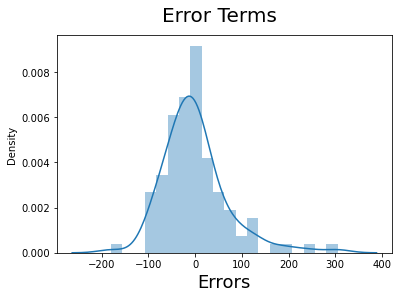

In [35]:
fig = plt.figure()
sns.distplot((y_train - y_train_weight), bins = 20)
fig.suptitle("Error Terms", fontsize=20)     # Plot heading
plt.xlabel("Errors", fontsize=18)  

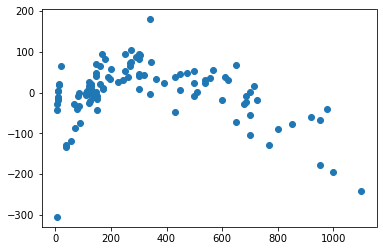

In [36]:
plt.scatter(y_train,res)
plt.show()

In [37]:
y_test = f_test.pop('Weight')
x_test = f_test

In [38]:
x_test = sm.add_constant(x_test)

In [39]:
x_test_rfe = x_test[x_train_rfe.columns]

In [40]:
y_pred = lm.predict(x_test_rfe)

In [41]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.928679817721199

Text(0, 0.5, 'y_pred')

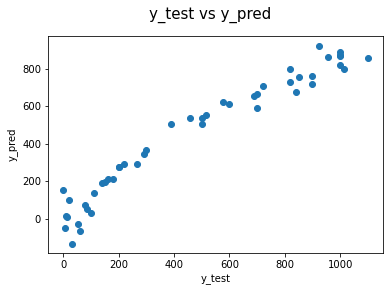

In [42]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred',fontsize=15)   # Plot Heading
plt.xlabel('y_test',fontsize=10)               # x-label
plt.ylabel('y_pred',fontsize=10)